# Web Scrapping Using Python

This is a web scrapping task to find conflict/war related news articles from the internet. There is been quite a lot of that considering the Russia/Ukraine conflict, The South Sudan conflict, and the Palestine/Israel conflict just to mention the most reported cases.

## Using Beautifulsoup + requests

### Understanding website's structure

Prior to scraping inspect the HTML source code of the web page to identify the elements you want to scrape

### Set up your develpment environment

Create a virtual environment, follow prompts per your IDE. For VScode I pressed `Ctrl+Shift+P `then searched `Python: Create Environment`
A beginner web scraper in Python is advised to start with `requests` and `beautifulsoup4` librarires which is what we will use.
<!-- First we try loggin in to hacker news website. -->


```
import requests
from bs4 import BeautifulSoup

baseurl = "https://news.ycombinator.com"
user = ""
passd = ""

s = requests.Session()
data = {"goto": "news", "acct": user, "pw": passd}
r = s.post(f'{baseurl}', data=data)

soup = BeautifulSoup(r.text, 'html.parser')
if soup.find(id='logout') is not None:
    print("Successfully logged in")
else:
    print("Authentication error")
```




### Inspect HTML element

Each post is wrapped in a `<tr>` tag with the class `athing`

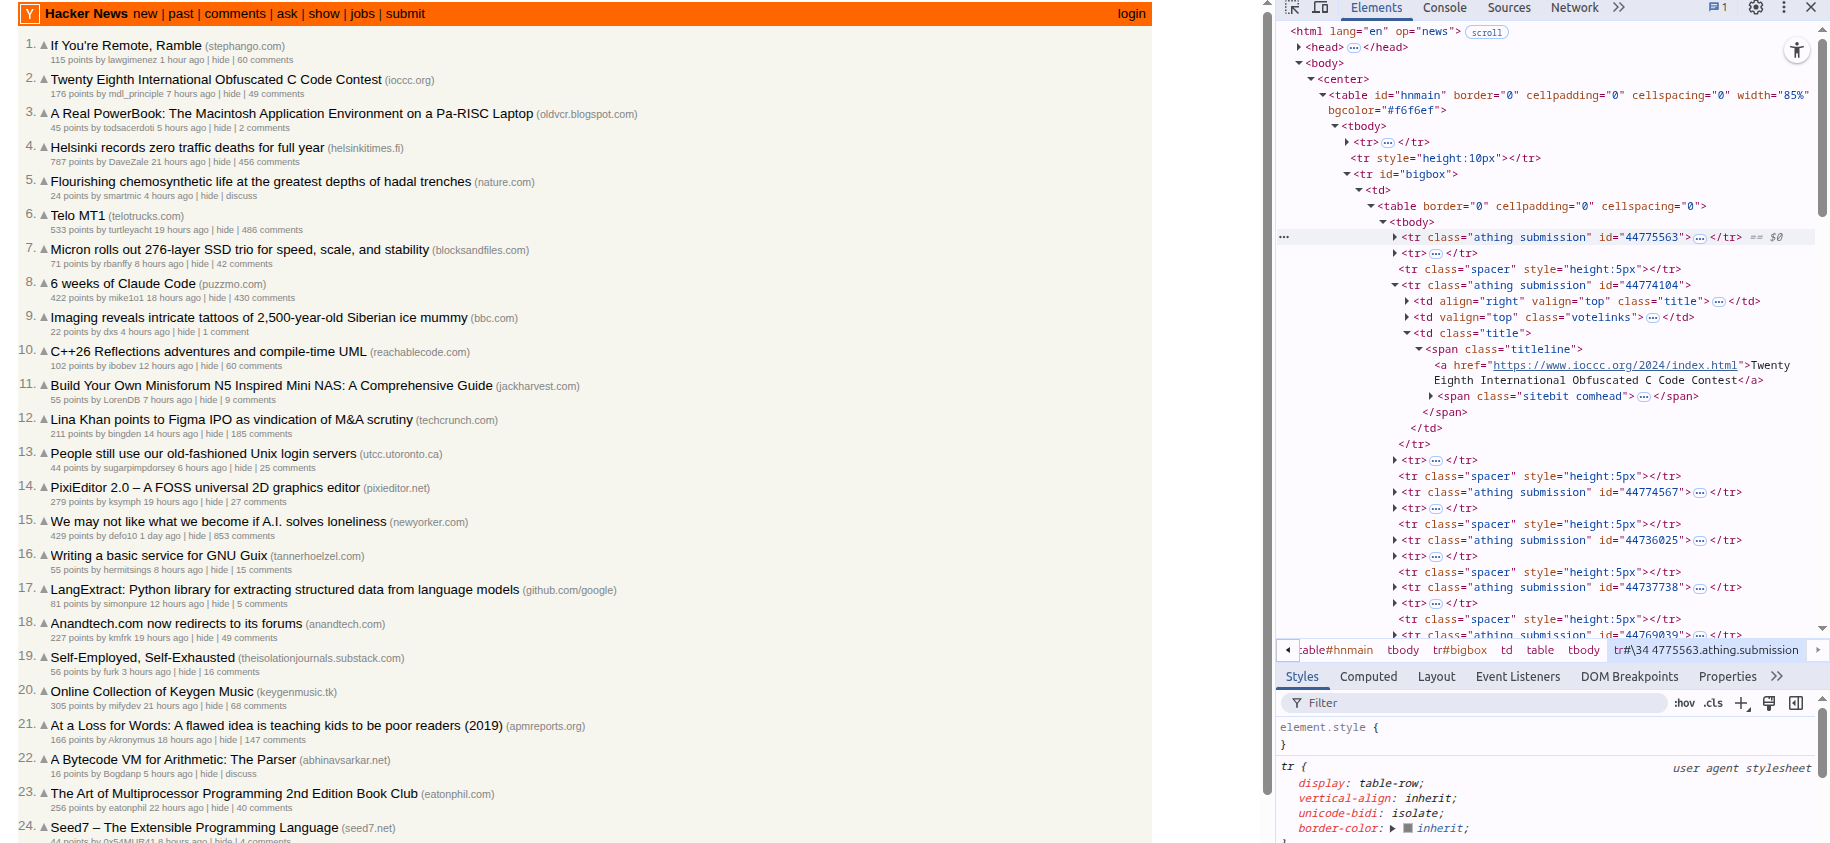

In [17]:

from PIL import Image
from IPython.display import display

import matplotlib.image as mpimg
image_path = "hacker-element.png"

image = Image.open(image_path)
display(image)



### Scrape with requests + beautifulsoup4

In [3]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://news.ycombinator.com/")
soup = BeautifulSoup(r.text, 'html.parser')
links = soup.find_all('tr', class_='athing')

formatted_links = []
for link in links:
    data = {
        'id': link['id'],
        'title': link.find_all("td")[2].a.text,
        'url': link.find_all("td")[2].a['href'],
        'rank': int(link.find_all("td")[0].span.text.replace('.', ''))
    }
    formatted_links.append(data)


    formatted_links.append(data)
    
print(formatted_links)


[{'id': '44754697', 'title': 'New quantum state of matter found at interface of exotic materials', 'url': 'https://phys.org/news/2025-07-quantum-state-interface-exotic-materials.html', 'rank': 1}, {'id': '44754697', 'title': 'New quantum state of matter found at interface of exotic materials', 'url': 'https://phys.org/news/2025-07-quantum-state-interface-exotic-materials.html', 'rank': 1}, {'id': '44778936', 'title': 'Modern Node.js Patterns', 'url': 'https://kashw1n.com/blog/nodejs-2025/', 'rank': 2}, {'id': '44778936', 'title': 'Modern Node.js Patterns', 'url': 'https://kashw1n.com/blog/nodejs-2025/', 'rank': 2}, {'id': '44780353', 'title': 'So you want to parse a PDF?', 'url': 'https://eliot-jones.com/2025/8/pdf-parsing-xref', 'rank': 3}, {'id': '44780353', 'title': 'So you want to parse a PDF?', 'url': 'https://eliot-jones.com/2025/8/pdf-parsing-xref', 'rank': 3}, {'id': '44779428', 'title': 'Writing a good design document', 'url': 'https://grantslatton.com/how-to-design-document',

### Store data as .csv

In [4]:
import csv

file = 'hacker_news_posts.csv'
with open(file, 'w', newline="") as f:
    writer = csv.DictWriter(f, fieldnames=['id', 'title', 'url', 'rank'])
    writer.writeheader()
    for row in formatted_links:
        writer.writerow(row)
        



### Store data in PostgreSQL

#### Step 1: Installing PostgreSQL

Follow the [PostgreSQL download page](https://www.postgresql.org/download/) for downloads and installation

#### Step 2: Creating a Database Table

First you'll need a table

```

#start service
sudo systemctl start postgresql.service

#log in as a superuser
sudo -i -u postgres

CREATE DATABASE scrape_demo;


CREATE TABLE "hn_links" (
    "id" INTEGER NOT NULL,
    "title" VARCHAR NOT NULL,
    "url" VARCHAR NOT NULL,
    "rank" INTEGER NOT NULL
);
```


#### Step 3: Install Psycopg2 to Connect to PostgreSQL

```
pip install psycopg2
```

Establish connection to the database

Ensure you set password for postgres user, which logs without a password by default

```

sudo -u postgres psql

postgres=# ALTER USER postgres PASSWORD 'myPassword';
ALTER ROLE

```

In [5]:
import psycopg2
import os
import dotenv
dotenv.load_dotenv()

p = os.getenv("pass")
table_name = "hn_links"
csv_path = "hacker_news_posts.csv"


con = psycopg2.connect(host="127.0.0.1", port="5432", user="postgres", password = p,database="scrape_demo")

# Get a database cursor
cur = con.cursor()

r = requests.get('https://news.ycombinator.com')
soup = BeautifulSoup(r.text, 'html.parser')
links = soup.findAll('tr', class_='athing')

for link in links:
    cur.execute("""
        INSERT INTO hn_links (id, title, url, rank)
        VALUES (%s, %s, %s, %s)
        """,
        (
            link['id'],
            link.find_all('td')[2].a.text,
            link.find_all('td')[2].a['href'],
            int(link.find_all('td')[0].span.text.replace('.', ''))
        )
    )

# Commit the data
con.commit()

# Close our database connections
cur.close()
con.close()

/tmp/ipykernel_8586/1184676145.py:18: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  links = soup.findAll('tr', class_='athing')


## Using ScapingBee Python Client

ScrapingBee is a subscription API providing a way to bypass any website's anti-scraping measures.

In [6]:
from scrapingbee import ScrapingBeeClient
import json
import pandas as pd

dotenv.load_dotenv()
key = os.getenv("spring_bee_api_key")

sb_client = ScrapingBeeClient(api_key=key)
url = "https://www.aljazeera.com/"



client = ScrapingBeeClient(api_key=key)

def google_news_headlines_api(country_code='US'):

    extract_rules = {
        "news": {
        "selector": "article",
        "type": "list",
            "output": {
                "title": ".gPFEn,.JtKRv",
                "source": ".vr1PYe",
                "time": "time@datetime",
                "author": ".bInasb",
                "link": ".WwrzSb@href"
            }
        }
    }

    js_scenario = {
        "instructions":[
            {"evaluate":"document.querySelectorAll('.WwrzSb').forEach( (e) => e.href = e.href );"}
        ]
    }

    response =  client.get(
        f'https://news.google.com/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRFZxYUdjU0FtVnVHZ0pWVXlnQVAB?&gl={country_code}',
        params={ 
            "custom_google": "true",
            "wait_for": ".bInasb",
            "extract_rules": extract_rules,
            "js_scenario": js_scenario, 
        },
        retries=2
    )

    if response.text.startswith('{"message":"Invalid api key:'):
        return f"Oops! It seems you may have missed adding your API KEY or you are using an incorrect key.\nGet your free API KEY and 1000 free scraping credits by signing up to our platform here: https://app.scrapingbee.com/account/register"
    else:
        def get_info():
            if len(response.json()['news']) == 0:
                return "FAILED TO RETRIEVE NEWS"
            else:
                return "SUCCESS"

        return pd.DataFrame({
            'count': len(response.json()['news']),
            'news_extracts': response.json()['news'],
            'info': f"{response.status_code} {get_info()}",
        })
#country_code: Set the news location; US, IN, etc.
df = google_news_headlines_api(country_code='US')

print(df.iloc[:10])

   count                                      news_extracts         info
0    265  {'title': 'Texas Democrats Leave State to Stop...  200 SUCCESS
1    265  {'title': 'Democrats flee Texas to block Repub...  200 SUCCESS
2    265  {'title': 'Greg Abbott Threatens to Expel Texa...  200 SUCCESS
3    265  {'title': 'Texas House Democrats flee the stat...  200 SUCCESS
4    265  {'title': 'White House advisers defend Trump’s...  200 SUCCESS
5    265  {'title': 'Trump Fired America’s Economic Data...  200 SUCCESS
6    265  {'title': 'What really goes on at the Bureau o...  200 SUCCESS
7    265  {'title': 'Trump’s rewriting of reality on job...  200 SUCCESS
8    265  {'title': 'Videos of emaciated hostages condem...  200 SUCCESS
9    265  {'title': 'Hamas says it will allow aid for ho...  200 SUCCESS


## [Web scraping with Scrapy](https://scrapfly.io/blog/posts/web-scraping-with-scrapy)

Scrapy is a web scraping framework using an event-driven networking infrastracture built around an asynchronous network engine that allows for more efficiency and scalability. It is made of a **crawler** that handles low-level logic, and a **spider** that is provider by the user to help the crawler generate request, parse and retrieve data.

In this section we use scrapy to scrape product listings available at [web-scraping.dev](https://web-scraping.dev/products), but first some house-keeping.


To install scrapy run `pip install scrapy` or better still add `scrapy` to your project's `requirements.txt` and run `pip install -r requirements.txt`. Start a scrapy project by running `scrapy startproject <project-name> <project-directory>` in terminal. Some scrapy commands below:


In [7]:
!scrapy --help

Scrapy 2.13.3 - active project: webscrapingdev

Usage:
  scrapy <command> [options] [args]

Available commands:
  bench         Run quick benchmark test
  check         Check spider contracts
  crawl         Run a spider
  edit          Edit spider
  fetch         Fetch a URL using the Scrapy downloader
  genspider     Generate new spider using pre-defined templates
  list          List available spiders
  parse         Parse URL (using its spider) and print the results
  runspider     Run a self-contained spider (without creating a project)
  settings      Get settings values
  shell         Interactive scraping console
  startproject  Create new project
  version       Print Scrapy version
  view          Open URL in browser, as seen by Scrapy

Use "scrapy <command> -h" to see more info about a command


### Creating a spider

run `scrapy genspider <name> <host-to-scrape>`

In [8]:
!scrapy genspider products web-scraping.dev

Spider 'products' already exists in module:
  webscrapingdev.spiders.products


In [9]:
!scrapy list
!tree

products
.
├── article-class.png
├── hacker-element.png
├── hacker_news_posts.csv
├── LICENSE
├── producthunt.json
├── README.md
├── requirements.txt
├── results.json
├── scrapy.cfg
├── web-scrap_files
│   ├── figure-html
│   │   └── cell-2-output-1.png
│   └── libs
│       ├── bootstrap
│       │   ├── bootstrap-b9f025fa521194ab51f5de92fbd134be.min.css
│       │   ├── bootstrap-icons.css
│       │   ├── bootstrap-icons.woff
│       │   └── bootstrap.min.js
│       ├── clipboard
│       │   └── clipboard.min.js
│       └── quarto-html
│           ├── anchor.min.js
│           ├── popper.min.js
│           ├── quarto.js
│           ├── quarto-syntax-highlighting-37eea08aefeeee20ff55810ff984fec1.css
│           ├── tabsets
│           │   └── tabsets.js
│           ├── tippy.css
│           └── tippy.umd.min.js
├── web-scrap.html
├── webscrapingdev
│   ├── __init__.py
│   ├── items.py
│   ├── middlewares.py
│   ├── pipelines.py
│   ├── __pycache__
│   │   ├── __init__.cpython-312.pyc
│  

if you open the generated spider - `products.py`, you'll find the following

```
import scrapy


class ProductsSpider(scrapy.Spider):
    name = "products"
    allowed_domains = ["web-scraping.dev"]
    start_urls = ["https://web-scraping.dev"]

    def parse(self, response):
        pass

```

- `name` is used as a reference to the spider for `scrapy` commands like `crawl`<name>` - this would run the scraper

- `allowed_domains` is a safety feauture restricting this spider to crawl only particular domains.

- `start_urls` indicates the spider starting point while `parse()` is the first callback to execute above instructions.





### Adding crawling logic

We want our `start_urls` to be some topic directories e.g., [https://www.producthunt.com/topics/developer-tools](https://www.producthunt.com/topics/developer-tools) and our `parse()` callback method to find all product links and schedule them to be scrapped:

```
# /spiders/products.py
import scrapy
from scrapy.http import Response, Request


class ProductsSpider(scrapy.Spider):
    name = 'products'
    allowed_domains = ['web-scraping.dev']
    start_urls = [
        'https://web-scraping.dev/products',
    ]

    def parse(self, response: Response):
        product_urls = response.xpath(
            "//div[@class='row product']/div/h3/a/@href"
        ).getall()
        for url in product_urls:
            yield Request(url, callback=self.parse_product)
        # or shortcut in scrapy >2.0
        # yield from response.follow_all(product_urls, callback=self.parse_product)
    
    def parse_product(self, response: Response):
        print(response)

```


### Adding Parsing Logic

Populate `parse_product()`

```
# /spiders/products.py
...

    def parse_product(self, response: Response):
        yield {
            "title": response.xpath("//h3[contains(@class, 'product-title')]/text()").get(),
            "price": response.xpath("//span[contains(@class, 'product-price')]/text()").get(),
            "image": response.xpath("//div[contains(@class, 'product-image')]/img/@src").get(),
            "description": response.xpath("//p[contains(@class, 'description')]/text()").get()
        }

```

### Basic Settings

Adjust recommended settings:

```
# settings.py
# will ignore /robots.txt rules that might prevent scraping
ROBOTSTXT_OBEY = False
# will cache all request to /httpcache directory which makes running spiders in development much quicker
# tip: to refresh cache just delete /httpcache directory
HTTPCACHE_ENABLED = True
# while developing we want to see debug logs
LOG_LEVEL = "DEBUG" # or "INFO" in production

# to avoid basic bot detection we want to set some basic headers
DEFAULT_REQUEST_HEADERS = {
    # we should use headers
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36",
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'Accept-Language': 'en',
}

```


### Running Spiders

Either through the `scrapy` command or explicitly calling scrapy using a Python script.

In [10]:
%%capture
!scrapy crawl products

### Saving results  

In [11]:
%%capture

!scrapy crawl products --output results.json

In [12]:
!tree

.
├── article-class.png
├── hacker-element.png
├── hacker_news_posts.csv
├── LICENSE
├── producthunt.json
├── README.md
├── requirements.txt
├── results.json
├── scrapy.cfg
├── web-scrap_files
│   ├── figure-html
│   │   └── cell-2-output-1.png
│   └── libs
│       ├── bootstrap
│       │   ├── bootstrap-b9f025fa521194ab51f5de92fbd134be.min.css
│       │   ├── bootstrap-icons.css
│       │   ├── bootstrap-icons.woff
│       │   └── bootstrap.min.js
│       ├── clipboard
│       │   └── clipboard.min.js
│       └── quarto-html
│           ├── anchor.min.js
│           ├── popper.min.js
│           ├── quarto.js
│           ├── quarto-syntax-highlighting-37eea08aefeeee20ff55810ff984fec1.css
│           ├── tabsets
│           │   └── tabsets.js
│           ├── tippy.css
│           └── tippy.umd.min.js
├── web-scrap.html
├── webscrapingdev
│   ├── __init__.py
│   ├── items.py
│   ├── middlewares.py
│   ├── pipelines.py
│   ├── __pycache__
│   │   ├── __init__.cpython-312.pyc
│   │   └── 

In [ ]:
import json
json_file = 'results.json'
with open(json_file, "w") as e:
    pass


with open(json_file) as f:
    j_obj = json.load(f)


json_fmt = json.dumps(j_obj, indent=2)
print(json_fmt)

[
  {
    "title": "Blue Energy Potion",
    "price": "$4.99",
    "image": "https://web-scraping.dev/assets/products/blue-potion.webp",
    "description": "Ignite your gaming sessions with our 'Blue Energy Potion', a premium energy drink crafted for dedicated gamers. Inspired by the classic video game potions, this energy drink provides a much-needed boost to keep you focused and energized. It's more than just an energy drink - it's an ode to the gaming culture, packaged in an aesthetically pleasing potion-like bottle that'll make you feel like you're in your favorite game world. Drink up and game on!"
  },
  {
    "title": "Red Energy Potion",
    "price": "$4.99",
    "image": "https://web-scraping.dev/assets/products/red-potion.webp",
    "description": "Elevate your game with our 'Red Potion', an extraordinary energy drink that's as enticing as it is effective. This fiery red potion delivers an explosive berry flavor and an energy kick that keeps you at the top of your game. Are y